In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

In [32]:
# Implementation of Eq. (1) in the exam set
def doublegyre(x, y, t, A, e, w):
    a = e * np.sin(w*t)
    b = 1 - 2*e*np.sin(w*t)
    f = a*x**2 + b*x
    return np.array([
            -np.pi*A*np.sin(np.pi*f) * np.cos(np.pi*y),              # x component of velocity
             np.pi*A*np.cos(np.pi*f) * np.sin(np.pi*y) * (2*a*x + b) # y component of velocity
        ])


# Wrapper function to pass to integrator
# X0 is a two-component vector [x, y]
def f(X, t):
    # Parameters of the velocity field
    A = 0.1
    e = 0.25 # epsilon
    w = 1    # omega
    return doublegyre(X[0], X[1], t, A, e, w)


# Forward Euler integrator
# X0 is a two-component vector [x, y]
def euler(X, t, dt, f):
    k1 = f(X,           t)
    return X + dt*k1


# 4th order Runge-Kutta integrator
# X0 is a two-component vector [x, y]
def rk4(X, t, dt, f):
    k1 = f(X,           t)
    k2 = f(X + k1*dt/2, t + dt/2)
    k3 = f(X + k2*dt/2, t + dt/2)
    k4 = f(X + k3*dt,   t + dt)
    return X + dt*(k1 + 2*k2 + 2*k3 + k4) / 6


# Function to calculate a trajectory from an
# initial position X0 at t = 0, moving forward
# until t = tmax, using the given timestep and
# integrator
def trajectory(X0, tmax, dt, integrator, f):
    t    = 0
    # Number of timesteps
    Nx = int(tmax / dt)
    # Array to hold the entire trajectory
    PX = np.zeros((2, Nx+1))
    # Initial position
    PX[:,0] = X0
    # Loop over all timesteps
    for i in range(1, Nx+1):
        PX[:,i] = integrator(PX[:,i-1], t, dt, f)
        t += dt
    # Return entire trajectory
    return PX

# Plot velocity vector field

(0, 1)

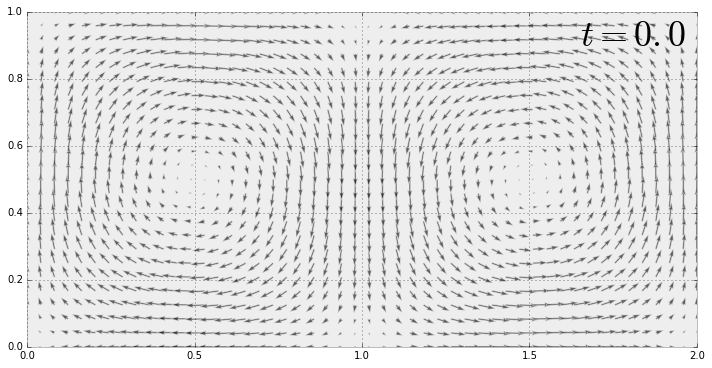

In [19]:
# Create a grid of points
x = np.linspace(0, 2, 50)
y = np.linspace(0, 1, 25)
X, Y = np.meshgrid(x, y)

# Time and parameters of current field
t = 0.0
A = 0.1
e = 0.25
w = 1

# Calculate field
V = doublegyre(X, Y, t, A, e, w)

# Vector plot
fig = plt.figure(figsize = (12,6))
plt.quiver(X, Y, V[0], V[1], linewidths = -1.0, scale = 10, alpha = 0.6)
# Add text showing time, and set plot limits
plt.text(1.65, 0.9, '$t = %s$' % t, size = 36)
plt.xlim(0,2)
plt.ylim(0,1)

# Plot trajectories

(0, 1)

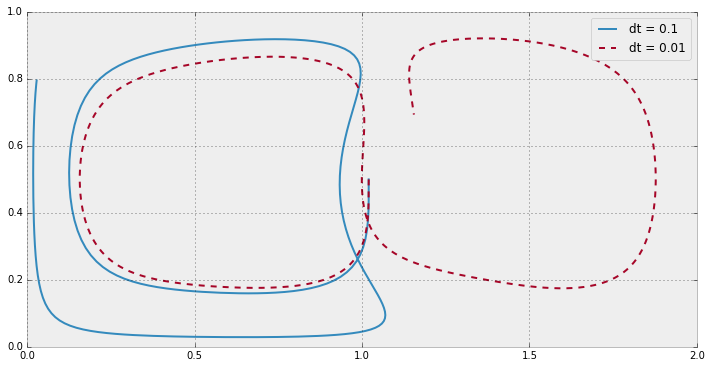

In [34]:
# Using forward Euler

X0   = [1.02, 0.5]
tmax = 20

# Set figure size
fig = plt.figure(figsize = (12,6))

# Plot trajectory for dt = 0.1
dt   = 0.1
T = trajectory(X0, tmax, dt, euler, f)
plt.plot(T[0,:], T[1,:], label = 'dt = %s' % dt)

# Plot trajectory for dt = 0.01
dt   = 0.01
T = trajectory(X0, tmax, dt, euler, f)
plt.plot(T[0,:], T[1,:], '--', label = 'dt = %s' % dt)

# Add legend and set limits
plt.legend()
plt.xlim(0,2)
plt.ylim(0,1)

(0, 1)

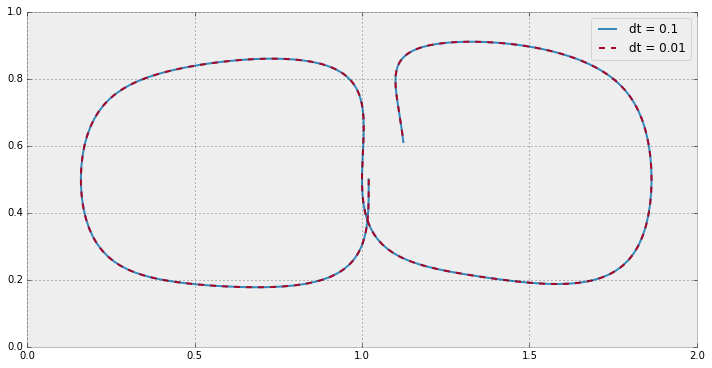

In [35]:
# Using Runge-Kutta

X0   = [1.02, 0.5]
tmax = 20

# Set figure size
fig = plt.figure(figsize = (12,6))

# Plot trajectory for dt = 0.1
dt   = 0.1
T = trajectory(X0, tmax, dt, rk4, f)
plt.plot(T[0,:], T[1,:], label = 'dt = %s' % dt)

# Plot trajectory for dt = 0.01
dt   = 0.01
T = trajectory(X0, tmax, dt, rk4, f)
plt.plot(T[0,:], T[1,:], '--', label = 'dt = %s' % dt)

# Add legend and set limits
plt.legend()
plt.xlim(0,2)
plt.ylim(0,1)

# Grid of points

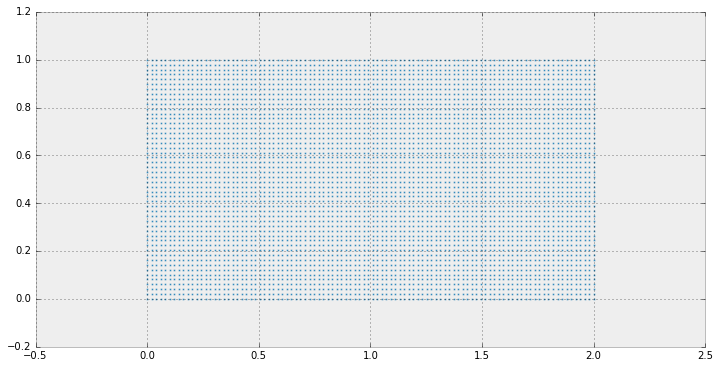

In [46]:
# Specify resolution
Nx = 100
Ny = 50

# Create lists of all x and y positions
X  = np.linspace(0, 2, Nx)
Y  = np.linspace(0, 1, Ny)

# Array to hold all grid points
X0 = np.zeros((2, Ny, Nx))
# Use meshgrid to turn lists into rank 2 arrays
# of x and y positions
X0[:] = np.meshgrid(X, Y)

# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X0[0,:], X0[1,:], marker = '.', c = '#348ABD')

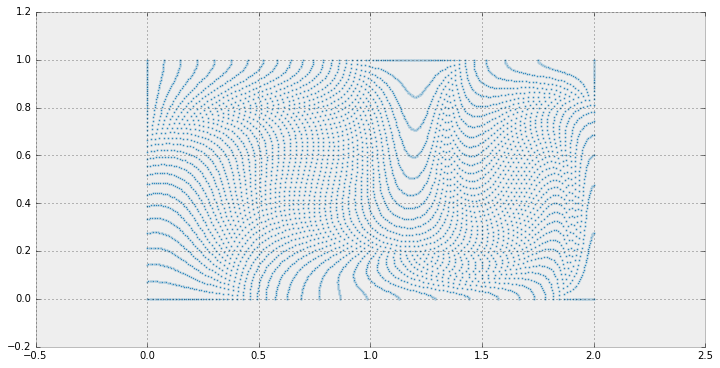

In [47]:
# Array to hold all grid points after transport
X1 = np.zeros((2, Ny, Nx))

# Transport parameters
tmax = 2.0
dt   = 0.5

# Loop over grid and update all positions
# This is where parallelisation would happen, since
# each position is independent of all the others
for i in range(Nx):
    for j in range(Ny):
        # Keep only the last position, not the entire trajectory
        X1[:,j,i] = trajectory(X0[:,j,i], tmax, dt, rk4, f)[:,-1]

        
# Make scatter plot to show all grid points
fig = plt.figure(figsize = (12,6))
plt.scatter(X1[0,:], X1[1,:], marker = '.', c = '#348ABD')